In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
N = 200
# Generate example data
X, y = make_regression(n_samples=N, n_features=1, noise=20, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
# Define the degrees of the polynomials to be evaluated
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a list to store the models
models = []

# Create a polynomial regression model for each degree
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    models.append(model)

# Calculate the bias-variance decomposition for each model
mse, bias, var = [], [], []
for model in models:
    mse_i, bias_i, var_i = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=500, random_seed=0)
    mse.append(mse_i)
    bias.append(bias_i)
    var.append(var_i)

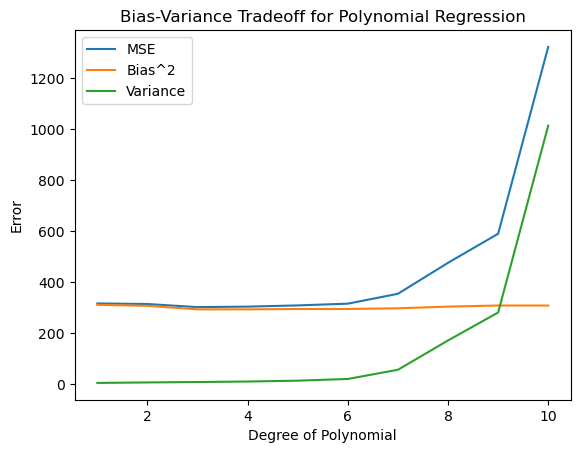

In [51]:
# Plot the results
plt.figure()
plt.plot(degrees, mse, label='MSE')
plt.plot(degrees, bias, label='Bias^2')
plt.plot(degrees, var, label='Variance')
plt.title('Bias-Variance Tradeoff for Polynomial Regression')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.legend()
plt.show()